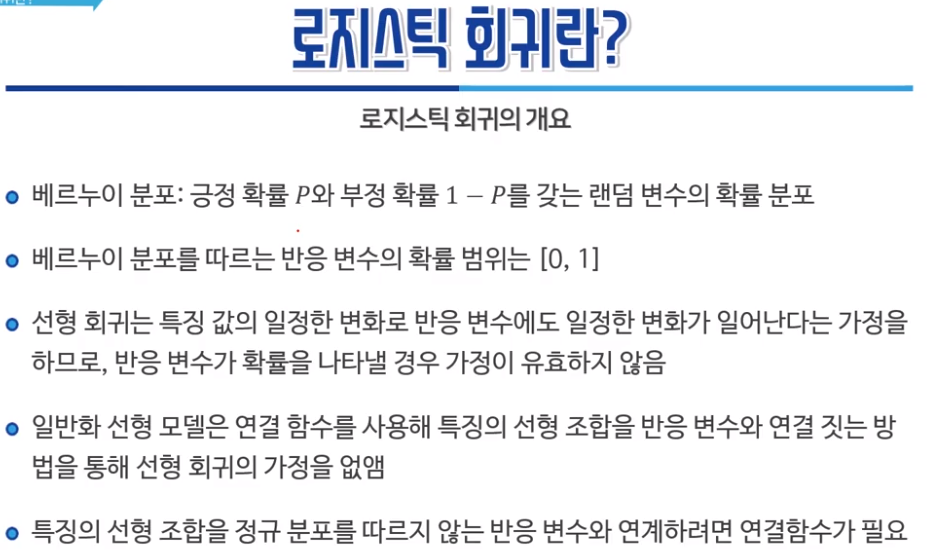

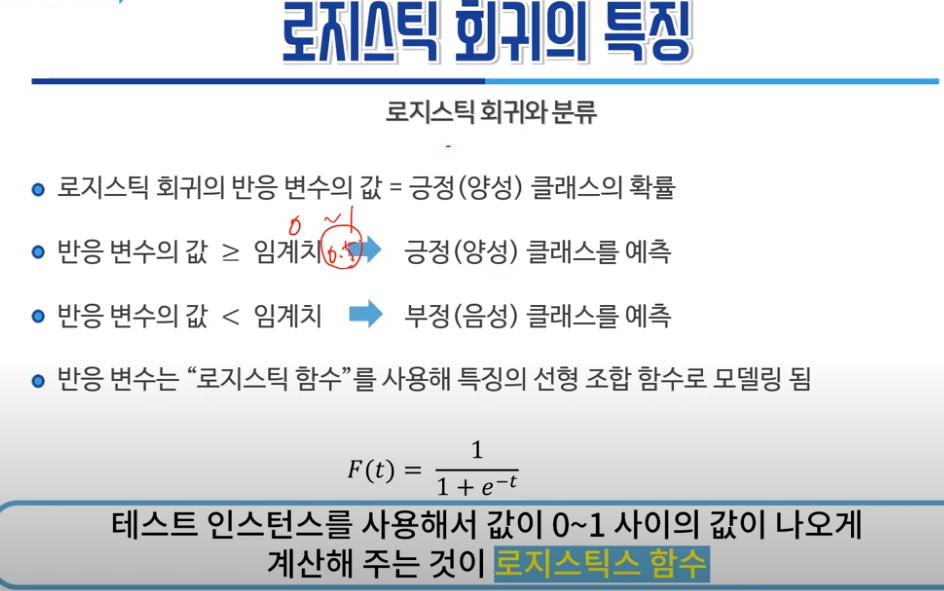

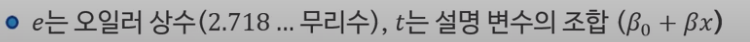

t는 설명 변수의 조합(β0=상수[절편] + βχ= 선형[β1χ1 + β2χ2 + β3χ3 + ''''])

F(t) = 0과 1사이값이 된다.





★ 의사결정 트리의 개요

   로지스틱 함수 = 시그모이드 함수   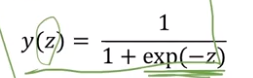
   


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

([<matplotlib.axis.YTick at 0x20dbefca208>,
 <a list of 5 Text yticklabel objects>)

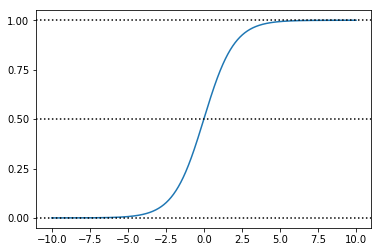

In [12]:
z = np.linspace(-10, 10, 1000)
y = sigmoid(z)

plt.plot(z, y)

plt.axhline(y =0, linestyle=":", color="black")
plt.axhline(y =0.5, linestyle=":", color="black")
plt.axhline(y =1, linestyle=":", color="black")

plt.yticks([0.0,0.25,0.5, 0.75, 1.0])

# 임계치 : 0.5 보다 크면 양성 클래스, 보다 작으면 음성 클래스.
# 로지스틱 회귀는 이진 분류
# (예:스팸 vs 햄, 양성종양 vs 악성종양, 흡연 vs 비흡연)

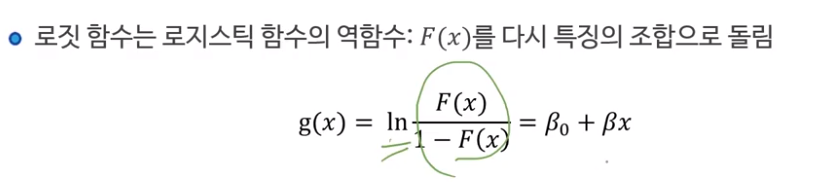


역함수를 적용하면 선형 방정식을 얻을 수 있음.

ln = 자연로그 , F(x) / 1-F(x) = odds rate(승산비)


★ 온라인 광고 클릭 예측을 위한 데이터 준비

In [20]:
import pandas as pd

#훈련할 데이터 불러오기
train_df = pd.read_csv("train.csv", nrows = 100000)
train_df.head()

,Unnamed: 0,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,2,15706,320,50,1722,0,35,-1,79
1,1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
2,2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
3,3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15706,320,50,1722,0,35,100084,79
4,4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,...,1,0,18993,320,50,2161,0,35,-1,157


In [19]:
#제거할 컬럼과 target컬럼을 선정한다.
unused_columns, label_column = ["id","hour","device_id","device_ip"], "click"

#데이터프레임에서 필요없는 컬럼 삭제
train_df = train_df.drop(unused_columns, axis=1)

#원핫인코딩을 위하여 리스트 형태로 바꾼다.
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())
y_train = train_df[label_column]

In [28]:
# 테스트할 테이터 불러오기
test_df = pd.read_csv("train.csv", header=0, skiprows=(1,100000), nrows = 100000)
test_df = test_df.drop(unused_columns, axis=1)
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())
y_test = test_df[label_column]

In [29]:
# ★ 원 핫 인토딩 벡터 변환
from sklearn.feature_extraction import DictVectorizer

In [31]:
vectorizer = DictVectorizer(sparse=True)

#훈련데이터 fit(적합)을 통한 변환
X_train = vectorizer.fit_transform(X_dict_train)

#테스트데이터 그냥 변환만.
X_test  = vectorizer.transform(X_dict_test)

In [ ]:
# 로지스틱 회귀모델 학스.
from sklearn.linear_model.logistic import LogisticRegression

In [34]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

# fit 결과정보 확인 법
# C=패널티정도를 말한다, 값이 커지면 규제가 느슨해지고(오버피팅), 0에 가까워지면 규제가 강해지는 경향.

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
# 그리드 서치를 이용한 로지스틱 회귀모델 학습.
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {"C":[0.001,0.01,0.1,1,10], "penalty":["l1","l2"]}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv = 3, scoring="roc_auc")
grid_search.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [39]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

In [40]:
clf_best = grid_search.best_estimator_

In [41]:
#예측하기
y_pred = clf_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# 예측 결과값을 구분하기
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([95977,  4023], dtype=int64))

In [46]:
# 정확도 측정 - metrics에 품질 척도를 산출 하는 함수가 포함됨.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83191

In [48]:
# 혼돈 매트릭스 사용.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[80839,  1671],
       [15138,  2352]], dtype=int64)

In [49]:
# ROC의 AUC
from sklearn.metrics import roc_auc_score, roc_curve

# 이진트리나 로지스틱 회귀는 확률 기반이므로 predict가 아니라 predict probability(predict_proba)를 사용하여 측정한다.
y_pred_proba = clf_best.predict_proba(X_test)[:,1]
y_pred_proba


array([0.20417723, 0.12867261, 0.28728929, ..., 0.1306243 , 0.09589868,
       0.0569978 ])

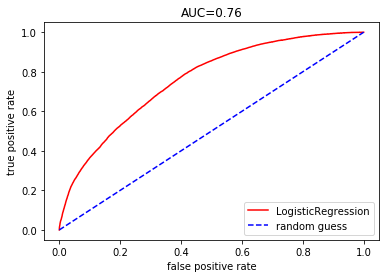

In [54]:
# roc_auc_score함수를 이용해 곡선의 밑면적과 관련돼 있는 정보를 바로 얻어서 사용할 수 있음.
fpr, tpr, _= roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#auc 지표를 통해서 분류기의 성능을 확인할 수 있음.
plt.plot(fpr, tpr, "r-", label="LogisticRegression")
plt.plot([0,1],[0,1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right")

#######################################################################

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#훈련 데이터 10만건 불러오기
train_df = pd.read_csv("train.csv", nrows=100000)

#사용할 항목(컬럼)을 구분한다.
unused_cols = ["id","hour","device_id","device_ip"]
label_col = "click"
train_df = train_df.drop(unused_cols, axis=1)

# 전치구조로 바꾸고 딕셔너리 형태로 바꾼다.( 범주형 데이터 변환을 위하여)
X_dict_train = list(train_df.drop(label_col, axis=1).T.to_dict().values())
y_train = train_df[label_col]

In [58]:
#테스트 데이터 10만건 불러오기
test_df = pd.read_csv("train.csv", header=0, skiprows=(1,100000), nrows=100000)

#사용할 항목(컬럼)을 구분한다.
test_df = test_df.drop(unused_cols, axis=1)

# 전치구조로 바꾸고 딕셔너리 형태로 바꾼다.( 범주형 데이터 변환을 위하여)
X_dict_test = list(test_df.drop(label_col, axis=1).T.to_dict().values())
y_test = test_df[label_col]

In [61]:
# DictVectorizer를 이용해 원핫인코딩 수행.
from sklearn.feature_extraction import DictVectorizer

# sparse=True는 희소행렬 구성, 1인값만 있고 0인값은 표기하지 않는다.
vectorizer = DictVectorizer(sparse=True)

#훈련용은 변환과 적합을 하고
X_train = vectorizer.fit_transform(X_dict_train)

#테스트 용은 변환만 한다.
X_test  = vectorizer.transform(X_dict_test)

In [63]:
#로지스틱 회귀 적합
from sklearn.linear_model.logistic import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01,0.1,1,10,100], "penalty":["l1","l2"]}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [70]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

In [71]:
clf_best = grid_search.best_estimator_

In [72]:
#y값 에측 하기.
y_pred = clf_best.predict(X_test)

In [97]:
# 성능 검증
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# 정확도 측정.
accuracy_score(y_test, y_pred)

0.83193

In [98]:
#혼돈 매트릭스 측정
confusion_matrix(y_test, y_pred)

array([[80837,  1673],
       [15134,  2356]], dtype=int64)

In [104]:
#로지스틱 회귀는 0,1을 구분한다, 정화한 소숫점까지 표기
y_pred_proba = clf_best.predict_proba(X_test)[:,1]

In [105]:
y_pred_proba

array([0.20420483, 0.12869004, 0.28724001, ..., 0.13063996, 0.09582937,
       0.05697835])

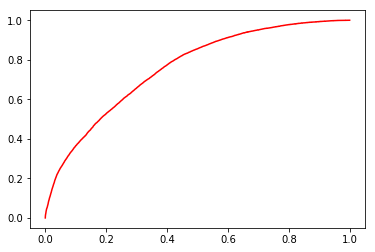

In [107]:
# fpr, tpr, _= roc_curve(y_test, y_pred_proba)
fpr, tpr, _= roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, "r-", label="LogisticRegression")